### Recurrent Neural Network using Gated Recurrent Unit(GRU)

In [1]:
#import the libraries needed
import numpy as np                   #used for algebra
import pandas as pd                  #used for reading csv files
import pandas_datareader.data as web #used to read data from a web source
import matplotlib.pyplot as plt      #used for plotting

In [2]:
#retrieving the data from the web source using pandas
BPI_data = web.DataReader("BPHLF", data_source='yahoo',start="2020-01-02",end="2022-10-07")
BPI_data #display of the data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1.6800,1.6800,1.6800,1.6800,0.0,0.054555
2020-01-03,1.6800,1.6800,1.6800,1.6800,0.0,0.054555
2020-01-06,1.6800,1.6800,1.6800,1.6800,0.0,0.054555
2020-01-07,1.6800,1.6800,1.6800,1.6800,0.0,0.054555
2020-01-08,1.6800,1.6800,1.6800,1.6800,0.0,0.054555
...,...,...,...,...,...,...
2022-10-03,1.8099,1.8099,1.8099,1.8099,0.0,1.809900
2022-10-04,1.6600,1.6600,1.6600,1.6600,100.0,1.660000
2022-10-05,1.6600,1.6600,1.6600,1.6600,0.0,1.660000


In [3]:
#used to index the Date column since it cannot be read by the libraries since Date is not a label
BPI_data.index
BPI_data_Open=BPI_data[["Open"]] #this returns a DataFrame, you don't need loc
BPI_data_dates=BPI_data.index.to_frame().reset_index(drop=True)
print(BPI_data_dates)

#Separate the Date index to be used later in the prediction
train_dates = pd.to_datetime(BPI_data_dates["Date"])

          Date
0   2020-01-02
1   2020-01-03
2   2020-01-06
3   2020-01-07
4   2020-01-08
..         ...
693 2022-10-03
694 2022-10-04
695 2022-10-05
696 2022-10-06
697 2022-10-07

[698 rows x 1 columns]


In [4]:
#import the preprocessing library for standardscaler to use in getting and transforming the values in the data
from sklearn.preprocessing import MinMaxScaler
#Save the Adj Close index to be used later in the prediction
returns = BPI_data["Adj Close"].pct_change()
#This standardizes the data and scales it to the unit variance
col_names = BPI_data.columns
x = BPI_data.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled) #saves a dataframe of the scaled data

In [5]:
#save the dataframe to a different name to avoid confusion
BPI_data_pct = df
BPI_data_pct.columns = col_names

In [6]:
BPI_data_pct #print the scaled data

,High,Low,Open,Close,Volume,Adj Close
0,0.638298,0.638298,0.638298,0.638298,0.00000,0.010561
1,0.638298,0.638298,0.638298,0.638298,0.00000,0.010561
2,0.638298,0.638298,0.638298,0.638298,0.00000,0.010561
3,0.638298,0.638298,0.638298,0.638298,0.00000,0.010561
4,0.638298,0.638298,0.638298,0.638298,0.00000,0.010561
...,...,...,...,...,...,...
693,0.776489,0.776489,0.776489,0.776489,0.00000,0.962004
694,0.617021,0.617021,0.617021,0.617021,0.01581,0.880754
695,0.617021,0.617021,0.617021,0.617021,0.00000,0.880754
696,0.617021,0.617021,0.617021,0.617021,0.00000,0.880754


In [7]:
returns #print the scaled Adj Close data from returns

Date
2020-01-02         NaN
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    0.000000
2020-01-08    0.000000
                ...   
2022-10-03    0.000000
2022-10-04   -0.082822
2022-10-05    0.000000
2022-10-06    0.000000
2022-10-07    0.000000
Name: Adj Close, Length: 698, dtype: float64

In [8]:
#This determines how many days you use to check - for - how many days to predict
samples = 10 #past days used to predict the future
steps = 1 #how many days in the future to predict
#create empty indeces to store the data later
X = [] #for the independent variables
y = [] #for the dependent variables
#loop used to determine the data to be stored in the empty sets X,y
for i in range(samples, BPI_data_pct.shape[0]-steps+1): #this loop determines the predicted value given the past values
    X.append(x_scaled[i-samples:i, 0:BPI_data.shape[1]])
    y.append(x_scaled[i+steps-1:i+steps, 0])

In [9]:
#print an example of the code above
print(X[0:1])
print(y[0:1])

[array([[0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082],
       [0.63829781, 0.63829781, 0.63829781, 0.63829781, 0.        ,
        0.01056082]])]
[array([0.63829781])]


In [10]:
#converts the X and y values into numpy arrays
X = np.array(X)
y = np.array(y)
#determines the test and train values using a threshold, the threshold determines the size of the test and train sets
threshold = round(0.9*X.shape[0])
X_train, y_train = X[:threshold], y[:threshold]
X_test, y_test = X[threshold:], y[threshold:]

In [11]:
#print to check the shape of the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(619, 10, 6)
(619, 1)
(69, 10, 6)
(69, 1)


In [12]:
from tensorflow.keras.models import Sequential #library used to import the model to be used
from tensorflow.keras.layers import Dense, Activation, Dropout, GRU #library used to import the layers of the neural network and the other needed function, namely the main layer used the GRU and other layers
#this is the model of the neural network starting from the input layer upto the output layer
model = Sequential()
model.add(GRU(15, activation="tanh", recurrent_activation="sigmoid", input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
#the model compiler used to finalize the model and get it ready for use in fitting and predicting
model.compile(optimizer="adam", loss="mean_squared_error")
h = model.fit(X_train, y_train, shuffle=False, epochs=100, batch_size=32, validation_split=0.2, verbose=1) #model fitting is the training and validation of the data

Epoch 1/100
16/16 [==============================] - 6s 97ms/step - loss: 0.1112 - val_loss: 0.0495
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0255 - val_loss: 0.0035
Epoch 3/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 0.0090
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0214 - val_loss: 0.0119
Epoch 5/100
16/16 [==============================] - 0s 12ms/step - loss: 0.0193 - val_loss: 0.0058
Epoch 6/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0188 - val_loss: 0.0047
Epoch 7/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0171 - val_loss: 0.0045
Epoch 8/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0145 - val_loss: 0.0038
Epoch 9/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0122 - val_loss: 0.0027
Epoch 10/100
16/16 [==============================] - 0s 14ms/step - loss: 0.0139 - val_loss: 0.0021

16/16 [==============================] - 0s 12ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 83/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 84/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 85/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 86/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 87/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0019
Epoch 88/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0047 - val_loss: 0.0015
Epoch 89/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0051 - val_loss: 0.0016
Epoch 90/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 91/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 

In [13]:
#print a summary of the model used
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15)                1035      
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


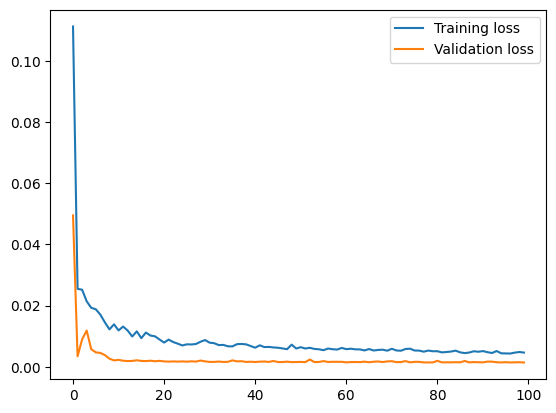

In [14]:
#a graph that shows the training loss vs the validation loss of the model
plt.plot(h.history['loss'], label='Training loss')
plt.plot(h.history['val_loss'], label='Validation loss')
plt.legend()

3/3 [==============================] - 1s 4ms/step


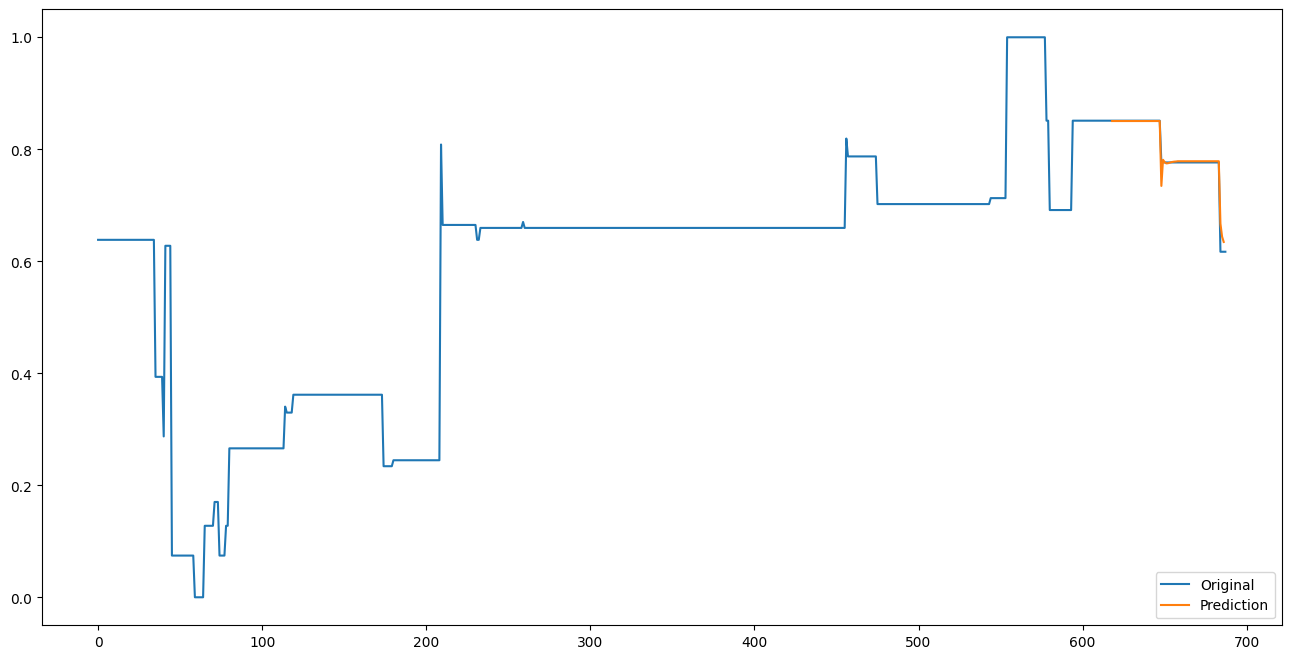

In [15]:
#storing and plotting the prediction values using the testing values
pred_test = model.predict(X_test)
plt.figure(figsize=(16,8))
plt.plot(y, label="Original")
plt.plot(range(y_train.shape[0]-1, y_train.shape[0]+y_test.shape[0]-1), pred_test, label="Prediction")
plt.legend(loc="lower right")

In [16]:
#The same as the one above, this determines how many days you use to check - for - how many days to predict
prediction_samples = 30 #past days used to predict the future
prediction_steps = 14  #how many days in the future to predict
#saves the timestamps to be used in the prediction
predict_period_dates = pd.date_range(list(train_dates)[-prediction_samples], periods=prediction_steps).tolist()
print(predict_period_dates)

[Timestamp('2022-08-26 00:00:00', freq='D'), Timestamp('2022-08-27 00:00:00', freq='D'), Timestamp('2022-08-28 00:00:00', freq='D'), Timestamp('2022-08-29 00:00:00', freq='D'), Timestamp('2022-08-30 00:00:00', freq='D'), Timestamp('2022-08-31 00:00:00', freq='D'), Timestamp('2022-09-01 00:00:00', freq='D'), Timestamp('2022-09-02 00:00:00', freq='D'), Timestamp('2022-09-03 00:00:00', freq='D'), Timestamp('2022-09-04 00:00:00', freq='D'), Timestamp('2022-09-05 00:00:00', freq='D'), Timestamp('2022-09-06 00:00:00', freq='D'), Timestamp('2022-09-07 00:00:00', freq='D'), Timestamp('2022-09-08 00:00:00', freq='D')]


In [17]:
#the prediction model used to predict the output of the next 14 days using data of the past 30 days
pred = model.predict(X_train[-prediction_steps:]) #predicts the forecast of the day
pred_copies = np.repeat(pred, BPI_data.shape[1], axis=-1) #repeats the prediction to complete the 14 day forecast

1/1 [==============================] - 0s 34ms/step


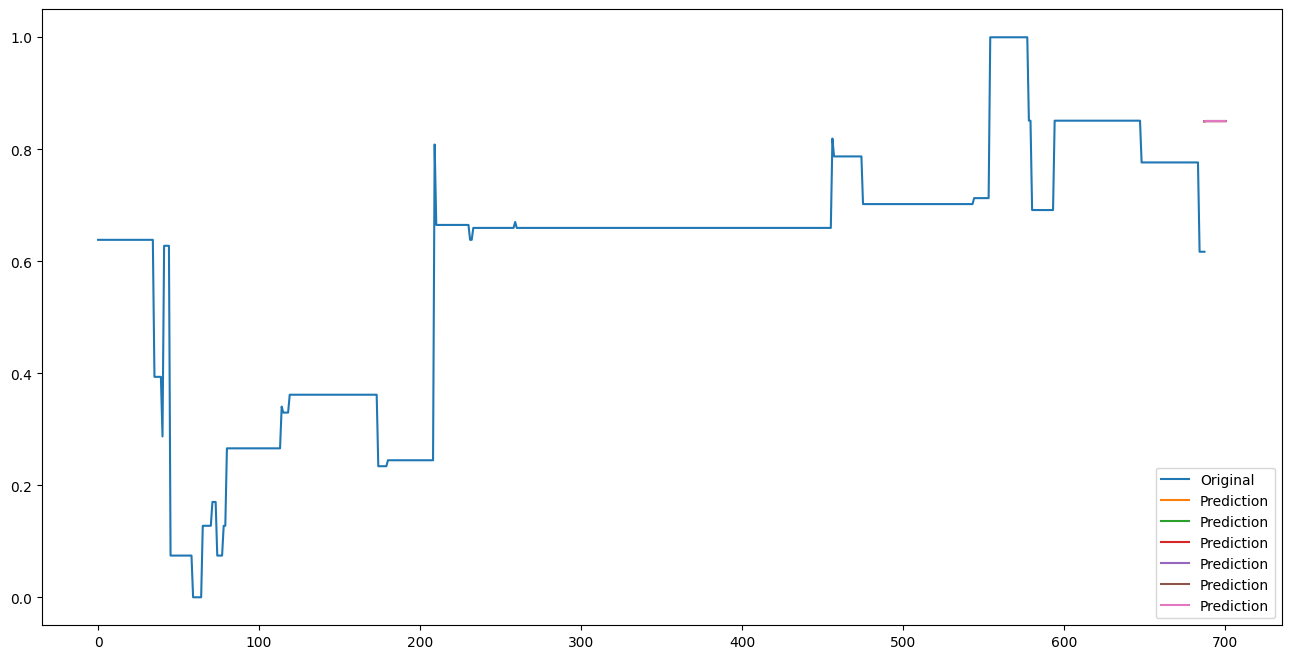

In [18]:
#The plot of the predicted values in the next 14 days compared to the previous values of the past 2 years
plt.figure(figsize=(16,8))
plt.plot(y, label="Original")
plt.plot(range(y.shape[0]-1, y.shape[0]+13), pred_copies, label="Prediction")
plt.legend(loc="lower right")